<a href="https://colab.research.google.com/github/Yashmishra55/CPP-Projects/blob/main/ML_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import numpy as np

In [5]:
df = pd.read_csv("/content/housing.csv")

In [6]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18899,-122.25,38.11,52.0,2846.0,705.0,1519.0,620.0,2.1976,97900.0,NEAR BAY
2112,-119.74,36.76,36.0,912.0,216.0,842.0,219.0,1.4766,52800.0,INLAND
9283,-122.58,38.08,27.0,10839.0,1637.0,4406.0,1623.0,5.6150,285600.0,NEAR BAY
3570,-118.59,34.22,17.0,6015.0,1464.0,3056.0,1347.0,4.0077,229000.0,<1H OCEAN
14170,-117.05,32.76,46.0,1887.0,359.0,795.0,358.0,3.2500,159600.0,NEAR OCEAN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [10]:
ohe = pd.get_dummies(df['ocean_proximity'])
ohe

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [11]:
df = df.join(ohe)

In [12]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12900,-121.33,38.63,23.0,1947.0,409.0,866.0,400.0,2.7181,156800.0,INLAND,0,1,0,0,0
1725,-122.37,37.95,35.0,215.0,45.0,100.0,34.0,1.6023,81300.0,NEAR BAY,0,0,0,1,0
2707,-115.49,32.87,19.0,541.0,104.0,457.0,106.0,3.3583,102800.0,INLAND,0,1,0,0,0
7352,-118.17,33.98,31.0,1236.0,329.0,1486.0,337.0,3.0938,155400.0,<1H OCEAN,1,0,0,0,0
12108,-117.31,33.97,28.0,3420.0,691.0,1502.0,656.0,3.4896,140300.0,INLAND,0,1,0,0,0


In [13]:
df.drop(['ocean_proximity'],axis=1, inplace=True)

In [14]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5081,-118.30,33.98,48.0,1998.0,410.0,1176.0,382.0,3.0455,102400.0,1,0,0,0,0
9069,-118.14,34.71,33.0,2347.0,461.0,1482.0,374.0,2.8194,93000.0,0,1,0,0,0
6349,-117.94,34.15,33.0,859.0,144.0,421.0,138.0,4.4821,220100.0,0,1,0,0,0
17801,-121.79,37.38,22.0,3650.0,527.0,1637.0,520.0,5.3774,325600.0,1,0,0,0,0
3303,-122.62,38.96,16.0,1914.0,446.0,828.0,332.0,2.0577,69000.0,0,1,0,0,0


In [26]:
X = df.drop(['median_house_value'], axis=1)
y = df.median_house_value

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49, shuffle=True)


In [31]:
X_train.shape

(16346, 13)

In [33]:
X_test.shape

(4087, 13)

In [34]:
y_train.shape

(16346,)

In [35]:
y_test.shape

(4087,)

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
lr.score(X_test, y_test)

0.6533808014004032

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6533808014004032

In [42]:
import seaborn as sns

<Axes: xlabel='median_house_value'>

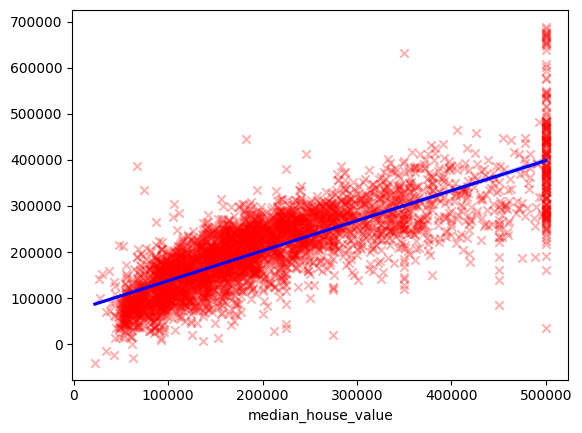

In [43]:
sns.regplot(x=y_test, y=y_pred, marker='x', scatter_kws={"color":"red", "alpha":0.3}, line_kws={"color":"blue"})